In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
div.text_cell_render{
    font-size:17pt
}
</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 11: Finite Element Methods (FEM) 1 <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-finite-elements-vs-volumes-vs-differences" data-toc-modified-id="Introduction:-finite-elements-vs-volumes-vs-differences-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: finite elements vs volumes vs differences</a></span></li><li><span><a href="#Approximating-a-function" data-toc-modified-id="Approximating-a-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Approximating a function</a></span><ul class="toc-item"><li><span><a href="#Piecewise-polynomials" data-toc-modified-id="Piecewise-polynomials-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Piecewise-polynomials</a></span></li><li><span><a href="#An-example" data-toc-modified-id="An-example-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Interpolation-of-a-function-(Lagrange-polynomial---a-reminder)" data-toc-modified-id="Interpolation-of-a-function-(Lagrange-polynomial---a-reminder)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Interpolation of a function (Lagrange polynomial - a reminder)</a></span><ul class="toc-item"><li><span><a href="#Comments" data-toc-modified-id="Comments-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Interpolation-errors" data-toc-modified-id="Interpolation-errors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Interpolation errors</a></span><ul class="toc-item"><li><span><a href="#Norms" data-toc-modified-id="Norms-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Norms</a></span></li><li><span><a href="#Error-bounds-formulae--[$\star$]" data-toc-modified-id="Error-bounds-formulae--[$\star$]-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Error bounds formulae  [$\star$]</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Comments</a></span></li></ul></li></ul></li><li><span><a href="#Basis-functions" data-toc-modified-id="Basis-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basis functions</a></span><ul class="toc-item"><li><span><a href="#Hat-functions" data-toc-modified-id="Hat-functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hat functions</a></span></li><li><span><a href="#Support-of-basis-functions" data-toc-modified-id="Support-of-basis-functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support of basis functions</a></span></li><li><span><a href="#Some-code-to-return-the-hat/basis-functions" data-toc-modified-id="Some-code-to-return-the-hat/basis-functions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Some code to return the hat/basis functions</a></span></li><li><span><a href="#Unstructured-mesh-data-structures" data-toc-modified-id="Unstructured-mesh-data-structures-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Unstructured mesh data structures</a></span><ul class="toc-item"><li><span><a href="#Terminology" data-toc-modified-id="Terminology-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Terminology</a></span></li></ul></li></ul></li><li><span><a href="#$L^2$-projection-of-a-function" data-toc-modified-id="$L^2$-projection-of-a-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>$L^2$ projection of a function</a></span><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Theory</a></span><ul class="toc-item"><li><span><a href="#Finite-dimensional-example" data-toc-modified-id="Finite-dimensional-example-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Finite-dimensional example</a></span></li></ul></li><li><span><a href="#Theory---continued" data-toc-modified-id="Theory---continued-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Theory - continued</a></span></li><li><span><a href="#Link-to-the-finite-element-method" data-toc-modified-id="Link-to-the-finite-element-method-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Link to the finite element method</a></span></li><li><span><a href="#Implementation---the-mass-matrix" data-toc-modified-id="Implementation---the-mass-matrix-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Implementation - the mass matrix</a></span></li><li><span><a href="#Implementation-in-code" data-toc-modified-id="Implementation-in-code-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Implementation in code</a></span></li><li><span><a href="#Quadrature" data-toc-modified-id="Quadrature-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Quadrature</a></span><ul class="toc-item"><li><span><a href="#Application-of-Simpson's-rule-[$\star$]" data-toc-modified-id="Application-of-Simpson's-rule-[$\star$]-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Application of Simpson's rule [$\star$]</a></span></li></ul></li><li><span><a href="#Approximation-using-a-continuous-function" data-toc-modified-id="Approximation-using-a-continuous-function-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Approximation using a continuous function</a></span></li><li><span><a href="#Quality-of-approximation" data-toc-modified-id="Quality-of-approximation-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Quality of approximation</a></span></li><li><span><a href="#RMS-(root-mean-square)-vs-$L^2$-norm-[reminder-from-ACSE-2]" data-toc-modified-id="RMS-(root-mean-square)-vs-$L^2$-norm-[reminder-from-ACSE-2]-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>RMS (root mean square) vs $L^2$ norm [reminder from ACSE-2]</a></span></li></ul></li><li><span><a href="#Solving-boundary-value-problems-(BVPs)-using-the-FEM" data-toc-modified-id="Solving-boundary-value-problems-(BVPs)-using-the-FEM-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Solving boundary value problems (BVPs) using the FEM</a></span><ul class="toc-item"><li><span><a href="#The-fundamental-form-of-the-discretisation-ignoring-BCs" data-toc-modified-id="The-fundamental-form-of-the-discretisation-ignoring-BCs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The fundamental form of the discretisation ignoring BCs</a></span><ul class="toc-item"><li><span><a href="#Weak-or-variational-form-of-problem" data-toc-modified-id="Weak-or-variational-form-of-problem-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Weak or variational form of problem</a></span></li><li><span><a href="#Discretisation-by-restricting-the-function-space-to-be-finite-dimensional" data-toc-modified-id="Discretisation-by-restricting-the-function-space-to-be-finite-dimensional-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Discretisation by restricting the function space to be finite-dimensional</a></span></li><li><span><a href="#Choice-of-basis-functions-(a.k.a.-choice-of-function-space-a.k.a.-choice-of-&quot;finite-element&quot;)" data-toc-modified-id="Choice-of-basis-functions-(a.k.a.-choice-of-function-space-a.k.a.-choice-of-&quot;finite-element&quot;)-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Choice of basis functions (a.k.a. choice of function space a.k.a. choice of "finite element")</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Finite element approximation</a></span></li><li><span><a href="#Terminology" data-toc-modified-id="Terminology-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Terminology</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#A-simple-problem-with-homogeneous-Dirichlet-BCs" data-toc-modified-id="A-simple-problem-with-homogeneous-Dirichlet-BCs-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>A simple problem with homogeneous Dirichlet BCs</a></span><ul class="toc-item"><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Finite element approximation</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#An-example-with-a-more-complex-RHS-with-homogeneous-Dirichlet-BCs-[$\star$]" data-toc-modified-id="An-example-with-a-more-complex-RHS-with-homogeneous-Dirichlet-BCs-[$\star$]-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>An example with a more complex RHS with homogeneous Dirichlet BCs [$\star$]</a></span><ul class="toc-item"><li><span><a href="#A-convergence-analysis" data-toc-modified-id="A-convergence-analysis-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>A convergence analysis</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Dealing-with-more-complex-BCs-(Inhomogeneous-Dirichlet)--[$\star$]" data-toc-modified-id="Dealing-with-more-complex-BCs-(Inhomogeneous-Dirichlet)--[$\star$]-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dealing with more complex BCs (Inhomogeneous Dirichlet)  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Finite element approximation</a></span></li></ul></li><li><span><a href="#Dealing-with-more-complex-BCs-(Neumann-conditions)--[$\star$]" data-toc-modified-id="Dealing-with-more-complex-BCs-(Neumann-conditions)--[$\star$]-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Dealing with more complex BCs (Neumann conditions)  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Variational-form-of-problem" data-toc-modified-id="Variational-form-of-problem-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Variational form of problem</a></span></li><li><span><a href="#Aside:-homogeneous-Neumann-boundary-conditions" data-toc-modified-id="Aside:-homogeneous-Neumann-boundary-conditions-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Aside: homogeneous Neumann boundary conditions</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Finite element approximation</a></span></li></ul></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final comments</a></span></li><li><span><a href="#The-perodic-table-of-finite-elements" data-toc-modified-id="The-perodic-table-of-finite-elements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>The perodic table of finite elements</a></span></li></ul></div>

# Learning objectives <a class="tocSkip">
    

- To introduce the finite element method
    
    
- How basis functions can be used to approximate functions, 
    
    
- and in turn how this idea can be used to project functions, and to solve differential equations 
    
    
- How different types of BCs can be dealt with

# Introductory comments <a class="tocSkip">
    
Note that there are numerous ways that the finite element method can be introduced and derived.  

A significant subset of these go about this task in a very abstract/mathematical way. 

Here we will take a more practical perspective, but be warned if you pick up a random textbook it may well go about things in a very different manner. Ultimately though we will end up at the same place.
    
<br>
    
NB. If you're already familiar with the FEM, we won't cover "assembly" today, we'll leave that until the next lecture when we consider problems in higher dimensions.    

In [1]:
%precision 6
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
from pprint import pprint

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Introduction: finite elements vs volumes vs differences

The finite element method can be interpreted in a way that sets it somewhat apart from finite difference and finite volume methods.

In any numerical method our aim is generally to replace or approximate something that is continuous (infinite dimensional) with something that is discrete (finite dimensional). We need to do this in order to allow us to find the approximation on a finite computer.

FD and FV methods sought to approximate derivatives or fluxes in the underlying equation in terms of discrete (i.e. discretised) solution information, i.e. it "discretised the underlying equation". We saw in the previous lecture, in 1D particularly, that the two aren't that different conceptually and lead to similar and even identical discretisations. 

The finite element method however is a little different - it takes an approach that approximates/discretises the numerical *solution* (function) but then asks that this solves the *exact* differential equation problem (in a weak sense). 

It is this approach, which approximates the solution function and not the underlying equation, that is the reason that (a) the approach can (is often) explained in quite a theoretical way, and (b) many powerful/useful theoretical results on errors, stability etc can be obtained.

The exact solution to a differential equation is a continuous function. And this function lives in an infinite-dimensional space of all possible functions (that satisfy some appropriate constraints, e.g. on their smoothness) and which is defined everywhere in space and time (in the case of time-dependent PDEs).

To (attempt to) find the exact solution analytically we can take derivatives of candidate solution functions and look for the one which satisfies our underlying PDE.

What we want to do here is approximate (discretise) this complex continuous function in a way that it becomes finite-dimensional, but such that it is still differentiable and we are therefore able to ask that it still satisfies our exact problem (in an appropriate sense to be explained later).

Note the difference with FD methods where we look for discrete solution values which satisfy the discretised PDE at a series of distinct points where we have replaced the derivatives with finite difference approximations.

With FEM we will therefore arrive at a solution that is equally valid everywhere, rather than just at discrete points.

This may all sound a little abstract, but hopefully things will become clear as we work through examples.

Rather than diving straight into discretising a differential equation problem, we will start our discussion of the finite element method by first considering ways in which we can approximate/discretise a function (which we can think of as the exact solution to our differential equation).

# Approximating a function

## Piecewise-polynomials

One way to start a description of the finite element method is to consider how we can approximate functions.

Suppose we have a function $f(x)$ and approximate it using a finite number of basis functions:

$$f_h(x) = \sum_{i=0}^N \alpha_i \phi_i(x). $$


So $f_h(x)\approx f(x)$ where


- $\alpha_i$ for $i=0,\,\ldots, N$ are the finite number of *weights* we need to find. 


- $\phi_i(x)$ for $i=0,\,\ldots, N$ are a finite number of prescribed *basis functions*.


Note that while $f(x)$ is continuous and potentially very complex (e.g. cannot be defined simply in terms of a finite number of parameters), the approximation $f_h(x)$ is effectively finite-dimensional as it is completely described by the $N+1$ weights (we assume the basis functions are chosen/given in advance). 

Importantly, and different to the numerical solutions obtained with FD methods, the approximation $f_h(x)$ is defined for all values of $x$,  and we can take its true derivatives that will also be defined everywhere (i.e. not need to use finite difference approximations of derivatives as we would with the FD method).

<br>

With this form of approximation there are actually a huge number of possibilities for us to proceed.

Firstly note that we haven't said anything about the nature of the basis functions $\phi_i(x)$. 

One option is for these to be so-called *global* functions, in that they are defined for all $x$ and are potentially non-zero across the total range of $x$ values, e.g. this would be the case with Fourier series approximations (or in the numerical solution of differential equations this would lead us to so-called [*spectral methods*](https://en.wikipedia.org/wiki/Spectral_method)).

However, an important aspect of the finite element method is that these basis functions are chosen to have *finite support*, i.e. they are only non-zero over a limited range of $x$ values (we will see below that this is a property we seek in order to ultimately arrive at a point where we need to solve linear systems involving *sparse* rather than dense matrices).

In addition, we look for basis functions which are easy to integrate.  The finite element method generally makes use of piecewise polynomial basis functions, which leads to our approximation $f_h(x)$ being a piecewise polynomial.

## An example

To help clarify these ideas let's consider a continuous and relatively complex function:

$$ f(x) = \sin(2\pi x) + \frac{3}{10}\cos(6\pi x^2).$$

First let's plot this over the interval $[0,1]$.

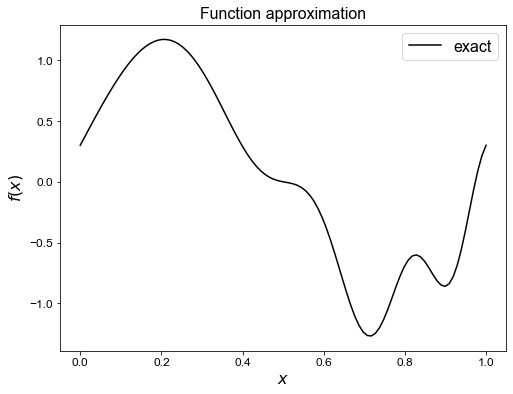

In [3]:
def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

x_fine = np.linspace(0. ,1. ,100)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
ax1.legend(loc='best', fontsize=16);

## Interpolation of a function (Lagrange polynomial - a reminder)

Perhaps the obvious way to approximate this with a sum over piecewise polynomials is to construct the piecewise linear interpolant, as we did in lecture 1.

We take a finite number of sample points (we assume 4 evenly distributed points in the examples below), and then for every pair of these find the linear polynomial that passes through or joins them.

We made the point in L1 that this is what you get if you plot the discrete data using default plotting options, but let's remind ourselves how we can use `numpy.polyfit` to find the linear polynomial approximation in between each pair of sample points.

For each pair of points this will provide an infinite line - we only want to use each line between each appropraite pair of points:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


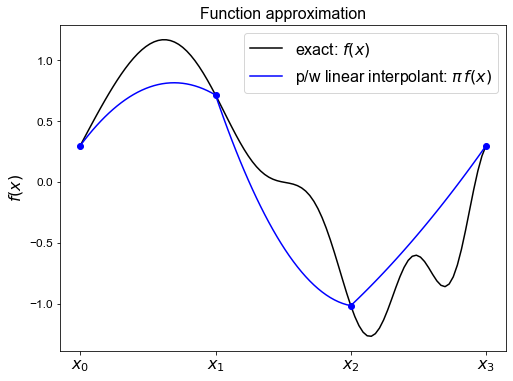

In [12]:
# discrete data
N_nodes = 4
# if we have 4 nodes, including at the ends of our domain, then we have 4-1=3 elements/cells
N_elements = N_nodes - 1
# and the element size is the total interval length divided by the number of elements
dx = 1./N_elements
# construct the node locations
x_nodes = np.linspace(0., 1., N_nodes)
# and evaluate our example function f(.) at these points
y_nodes = f(x_nodes)
# define a much finer mesh for plotting purposes
x_fine = np.linspace(0. ,1. ,100)

# initialise the value of our interpolant at x_fine to zero 
# [see lecture 1 for a similar p/w quadratic example we considered]
P1 = np.zeros_like(x_fine)
# loop over each pair of data points 
for i in range(N_elements):
    # use polyfit to construct a linear polynomial fit to the data at nodes i and i+1
    P1_loc = np.polyfit(x_nodes[i:i + 3], y_nodes[i:i +3], 2)
    # use polyval to evaluate P1_loc at the x_fine values, 
    # but only for those values in the local interval [x_{i},x_{i+1}]
    P1 += np.polyval(P1_loc, x_fine) * (x_fine >= x_nodes[i]) * (x_fine <= x_nodes[i + 1])

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
#ax1.set_xlabel('$x$', fontsize=16)
ax1.set_xticks((x_nodes[0],x_nodes[1],x_nodes[2],x_nodes[3]))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$', ), fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
# plot the exact function on a fine mesh
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact: $f(x)$')
# plot the p/w linear interpolant on a coarse mesh
ax1.plot(x_fine, P1, 'b', label='p/w linear interpolant: $\pi\,f(x)$')
ax1.plot(x_nodes, f(x_nodes), 'bo')
ax1.legend(loc='best', fontsize=16);

### Comments

NB. a common notation for an *interpolant* of a function $f$, is the function $\pi f$ - think of $\pi$ as an operator that turns a function $f$ into its interpolant.


- Recall that an interpolant passes through the underlying function (or rather discrete data obtained from evaluating the function) exactly at the data points: $\pi f(x_i)=f(x_i)$ $\forall i$.


- We see this in the plot above with the blue dots.


- But we will see below that this is *not* the only option available to us.

## Interpolation errors

### Norms

Note that unless our function itself is linear, a linear interpolant will have errors in between the data points (where the approximation is by definition exact).

The difference

$$ f - \pi f,$$

which is itself is a function of $x$, is called the *interpolation error*.

To judge if it is large or small we need a norm to turn it into a single number, i.e. we need to compute $\,\| f - \pi f \|$.

The $L^2$ norm is often used for this purpose as it says something about the size of a function.

For a general function $v$, the $L^2$ norm over a domain $I$ is defined as

$$\|v\|_{L^2(I)} = \left( \int_I\, v^2\, dx\right)^{1/2},$$


where $I$ might be our entire domain, or a single sub-interval/element.

<div class="optional">

### Error bounds formulae  [$\star$]

We will state the following standard results without proving them.

Over a single element $e_i$ we have the (linear) interpolation error bound

$$\| f - \pi f\|_{L^2(e_i)} \leq C \, \Delta x_i^2 \, ||f''||_{L^2(e_i)}, $$

where $C$ is a constant,
$e_i := [x_i,x_{i+1}]$ and $\Delta x_i = x_{i+1} - x_{i}$ (we're assuming we're in 1D here).


We can sum up this result over our entire domain:


$$ \| f - \pi f\|_{L^2(I)} \leq C \sum_{i=0}^N \Delta x_i^2 \, ||f''||_{L^2(e_i)}.$$


</div>

### Comments

- This is consistent with what we've seen before with Taylor series analysis in previous lectures - the error is zero for a p/w linear interpolant if $f$ is linear (as the second derivative is zero), and is larger for a larger mesh spacing or a more complex function. The error converges at second order with mesh spacing.


- It turns our that while being exact at the nodes, when considered in terms of the $L^2$ (and other) norm we can do better


- and remember we want/have a solution equally valid everywhere so we need to consider its quality away from the nodes as well.

# Basis functions

To progress we need to introduce basis functions, which are a critical component of the finite element method.

So far we have considered a piecewise linear approximation to our function. 

But how can we write this as an expansion of the form from earlier:

$$f_h(x) = \sum_{j=0}^N \alpha_j \phi_j(x), $$

and what are the basis functions $\phi_j(x)$ here?

[Why am I using $j$ here for the sum rather than the more obvious $i$ (they're *dummy indices* so it of course doesn't actually matter which I use) - we will see why later.]

## Hat functions

If you think about it the answer is the following

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

which have the name hat (or chapeau) functions, and look like the following.


<img src="figures/fem_basis_functions.svg" style="width: 800px">



## Support of basis functions

An important aspect of the finite element method is appreciating when the basis functions and the products of basis functions, e.g.

$$\phi_i \, \phi_j\,,$$

are non-zero.

We call the area a function is non-zero its *support*, and with the FEM we are looking for this area to be finite and for each basis function for this to be confined to a small portion of the overall domain - the mathematical term is [*compact support*](https://mathworld.wolfram.com/CompactSupport.html).

For a given value of $\,i$, based upon the above schematic for what values of $\,j\,$ is the product non-zero anywhere (alternatively, for what choices of $j$, given $i$, is the product zero everywhere?).

Similarly note that the derivative of a basis function $\,\phi_{i,x}\,$, has the same (finite) support as $\,\phi_i\,$ and hence the same result holds for the products

$$\phi_{i}\,\phi_{j,x}\,, \;\;\;\;\; \phi'_{i}\,\phi_{j}\,,\;\;\;\;\;\text{and}\;\;\;\; \phi'_{i}\,\phi'_{j}\,,$$

where the subscript "comma $x$" and the primes in the line above are just notation to indicate the $x$ derivatives of the basis functions.

## Some code to return the hat/basis functions

First let's implement a function that returns the $i$-th hat function on a mesh.  You can try playing with the value for $i$ and seeing how it changes the plot.

Second we show how we can make use of these basis functions to implement a function returning $f_h(x)$ for given weights.

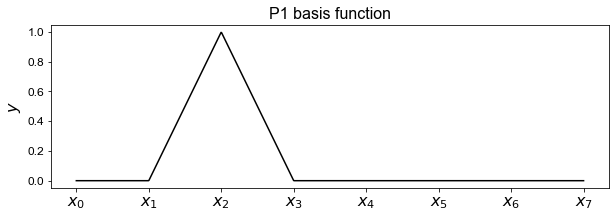

In [14]:
def hat_function(i, x_nodes):
    """ Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

# let's plot what this function returns
# first set up the nodes, a fine mesh to use to plot and the axes
x_nodes = np.linspace(0,1,8)
x_fine = np.linspace(0,1,1000)
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(111)
ax1.set_xticks((x_nodes))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$x_7$' ), fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('P1 basis function', fontsize=16)

# you can change the following to be in [0,n] to change what the 
# function returns for a given node number
node = 2
phi = hat_function(node, x_nodes)
# it's returned a function phi, so just evaluate this on the mesh
ax1.plot(x_fine, phi(x_fine), 'k-');

Now use this function which returns the "basis functions" to construct the piecewise linear function $f_h(x)$, where the required weights are just given by the function $f$ evaluates at the node locations (`y_nodes = f(x_nodes)`).

In this implementation our function returns the values of $f_h(x)$ at a prescribed array of $x$ locations.

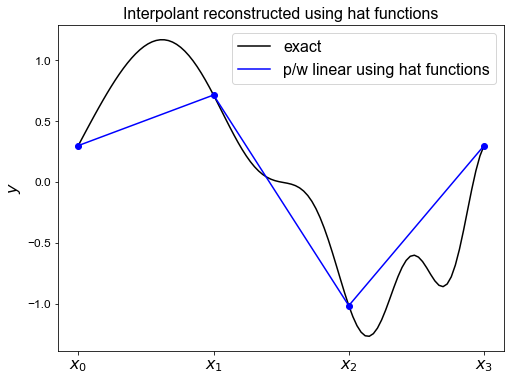

In [15]:
# discrete data
N_nodes = 4
# if we have 4 nodes, including at the ends of our domain, then we have 4-1=3 elements/cells
N_elements = N_nodes - 1
# and the element size is the total interval length divided by the number of elements
dx = 1./N_elements
# construct the node locations
x_nodes = np.linspace(0., 1., N_nodes)

# and evaluate our function at these points - these will be our weights
y_nodes = f(x_nodes)

# now a function to reconstruct the p/w linear function
def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values, equivalently the basis functions
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

x_fine = np.linspace(0,1,100)
f_h = pwlinear(x_nodes, y_nodes, x_fine)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
#ax1.set_xlabel('$x$', fontsize=16)
ax1.set_xticks((x_nodes[0],x_nodes[1],x_nodes[2],x_nodes[3]))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$', ), fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Interpolant reconstructed using hat functions', fontsize=16)
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
ax1.plot(x_fine, f_h, 'b-', label = 'p/w linear using hat functions')
ax1.plot(x_nodes, f(x_nodes), 'bo')
ax1.legend(loc='best', fontsize=16);

So as expected the expansion of these hat (basis) functions goes through the values given by the weights, with straight lines in between.

## Unstructured mesh data structures

[Note we'll return to this topic in more detail in the next lecture].

The following image presents a schematic of an unstructured mesh data structure, or connectivity, in the simple 1D case and assuming that we have two nodes per element, and that these are located at the ends of the elements (other more complex choices are possible!)

<img src="figures/connectivity_1d.svg" style="width: 500px">

- Blue are the *element numbers*


- Red are the *local node numbers*


- Black are the *global node numbers*


The connectivity can be described by the so-called connectivity matrix, which again in 1D takes the particularly simple form

\begin{pmatrix}
    0 & 1 & \ldots & i-1 & i   & i+1 & \ldots & n \\
    1 & 2 & \ldots & i   & i+1 & i+2 & \ldots & n+1
\end{pmatrix}

the column being the element, the row the local node number, and the entry of the matrix then being the global node number.

The size of the connectivity matrix is therefore: 

$$\text{the number of local nodes per element}\;\;\times\;\;\text{the number of elements}.$$

### Terminology


- *element*, cell, "finite volume" essentially mean the same thing - discrete objects used to cover or *tessellate* the entire domain


- *vertices* are the geometrical objects used to define the elements, e.g. the two end points of each sub-interval in 1D,  3 corners of a triangle etc.


- *nodes* are the locations where our unknowns (that we will be solving for) are located, in the early stages of our discussions nodes$\equiv$vertices, but this won't always be the case 


- a simple example would be to have three nodes within each interval (at each end and one in the middle) and use these with a quadratic basis function, but only two of them required as the vertices defining the cell. More complex basis functions won't co-locate any of the nodes with the vertices!

# $L^2$ projection of a function

Of course interpolation is not the only way to approximate a function.

Indeed interpolation is really developed primarily for the use case where we are given finite $(x,y)$ data, and we don't have enough information to do anything other than pass through these values as well as possible.

In the case here (projection) we actually have access to the underlying function and so we should be able to do better than what we obtain with interpolation.

To do better with the same number of free parameters (i.e. on the same finite mesh and assuming the same basis functions) we need to relax the assumption that the finite-dimensional approximation passes through the actual function values at the nodes of the mesh.

Basically, we have a set of basis functions $,\phi_i(x)$, $\,i=0,1,\ldots,N$, which through their linear combinations 
define a space $V_h$ - which here is clearly the space of all piecewise-linear continuous functions. 

That is $v\in V_h$ if and only if we can write

$$v(x) \equiv \sum_{j=0}^N \alpha_j \phi_j(x),$$

for some combination of weights $\alpha_j$.

We want to find the function in this space which minimises the error.  The interpolant $\,\pi f\,$ is clearly ***a*** member of this space, but as we shall see not necessarily the best solution for us.

## Theory

So we want to

$$\text{find} \;\;\;v\in V_h\;\;\; \text{which minimises }
\;\;\;\; \| f - v\|^2_{L^2(I)} .$$

It turns out that as we ask the question in terms of the $L^2$ norm, the answer we are looking for is the function $\,v=P_h\,f\,$ where $P_h$ stands for the so-called ***$L^2$ projection*** of the function $f$ - think if it as anther operator like $\pi$ but potentially giving a different answer.

The $L^2$ projection $P_h\,f$, which is a function in $V_h$, is uniquely defined by that property that

$$ \int_I \,(f - P_h\,f )\,v\,dx = 0,\;\;\;\; \forall \; v\in V_h.$$


What is this telling us?


1. This means that the error or the residual $(f - P_h\,f)$ is [***orthogonal***](https://en.wikipedia.org/wiki/Orthogonal_functions) to every function in $V_h$. 


2. This in turn means that the $P_h\,f$ we obtain is the closest function *within* $V_h$ to $f$.


3. This means that in the case that $f\in V_h$, i.e. if $f$ is itself p/w linear, then our result is exact: $P_h\,f\equiv f$.

### Finite-dimensional example

Visually, pretend that $V_h$ is represented by a straight line in 2D space, and we want to find the point on the line closest to an arbitrary point anywhere in 2D - sketch this case.


## Theory - continued

How does us satisfying the above constraints "uniquely define" $P_h\,f$? 

Well notice that $\,P_h\,f = \sum_{j=0}^N \alpha_j \phi_j(x)\,$ has $N+1$ free parameters, and the requirement that the above integral is zero for all $v\in V_h$ actually yields us $N+1$ pieces of information, as $V_h$ also has dimension $n+1$.

So we have $N+1$ unknowns and $N+1$ equations and we know that we can in principle solve this system uniquely.

Specifically, by linearity this requirement is completely equivalent to requiring orthogonality to the individual basis functions:

$$ \int_I \,(f - P_h\,f )\,\phi_i\,dx = 0,\;\;\;\; i=0,1,\ldots N.$$

So what do we have?

For $i=0,1,\ldots n$ we want the following to be true

\begin{align*}
\int_I \,(f - P_h\,f )\,\phi_i\,dx  &= 0 \\[10pt]
\iff  \int_I \, (P_h\,f) \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \int_I \,\sum_{j=0}^n \alpha_j \phi_j \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \sum_{j=0}^N \alpha_j  \int_I \,\phi_j \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \sum_{j=0}^N \alpha_j  M_{ij} &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff    M\,\boldsymbol{\alpha} &=  \boldsymbol{RHS},
\end{align*}

where $M$ is the so-called *mass matrix*, $\boldsymbol{\alpha}$ is the vector of unknown weights ${\alpha}_j$, and the RHS vector has the entries $\int_I \,f \,\phi_i\,dx$.

For historical reasons the RHS is sometimes called the *load* vector.

We need to compute the mass matrix and the load vector, solve the linear system for the weights $\boldsymbol{\alpha}$ and we have our $L^2$ projection.

Note that we introduced notation for our solution to this (projection) problem at the start of this discussion: $\,P_h\,f\,$.

Alternatively we could have posed the problem as find $v_h\in V_h$ such that $v=f$ in a weak sense,
i.e.

$$ \int_I \,(f - v_h )\,\phi_i\,dx = 0,\;\;\;\; i=0,1,\ldots N,$$

and since we can write $v_h = \sum_{j=0}^N \alpha_j \phi_j(x)\,$, this leads to exactly the same result as in the previous cell.

<br>

The point I'm making here is to emphasise that we solved the *equation* $v=f$, using the "finite element method" (which invovles discretising $v$ and utilising the weak form of the equation).

## Link to the finite element method

This is basically the crux of the finite element method, but when solving a **differential equation** instead of starting from the **equation**  $\,v = f\,$ and going through the above $L^2$ projection procedure to find the best approximation (which we know to be $\,v=P_h\,f$) from within the function space our basis functions span, we instead start from our *differential equation* and consider the weak form of that. 

In the case of a differential equation we shall see that we get different, or additional, matrices on the LHS, and we also need to deal with boundary conditions. We will see plenty of examples in the context of BVPs and PDEs.

## Implementation - the mass matrix


Define the mass matrix to be the matrix $M$ with entries

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx. $$

[NB. Note that if the basis functions where what is called orthogonal functions then the mass matrix would be diagonal.]

In our case we choose basis functions with finite support - what does this mean?

Well if we consider the form of our top hat function, for a given row, i.e. a given value of $i$, then the integrand will be zero for all $j$ values other than $j=i$, and $j=i\pm 1$, i.e. the mass matrix is tridiagonal.

<br>

Remembering that

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

<br>


In the case $j=i$ we can compute the diagonal entry of the mass matrix:

\begin{align*}
M_{ii} &= \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{x_{i+1} - x}{\Delta x_{i}}\,\frac{x_{i+1} - x}{\Delta x_{i}}\,  dx\\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s^2\,  ds + \frac{1}{\Delta x_{i}^2}\int_{0}^{\Delta x_{i}} \, (\Delta x_{i} - t)^2\,  dt\\
& \qquad \qquad (\text{where}\;\;\; s:=x - x_{i-1},\;\;\;
t:=x - x_i\implies x_{i+1} - x = \Delta x_{i} -t)\\[5pt]
& = \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}.
\end{align*}

Similarly,

\begin{align*}
M_{i,i-1}
& = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_{i-1}(x)\,\phi_i(x)\,  dx\;\;\;\;\;\;(\text{the second term here is zero!})\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx \\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \, \frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x_i - x}{\Delta x_{i-1}}\,  dx \\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s(x_i - (s+x_{i-1})\,  ds 
\;\;\;\;\;\;(\text{where}\;\;\; s:=x - x_{i-1})\\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s(\Delta x_{i-1} - s)\,  ds \\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \left[\frac{s^2}{2}\Delta x_{i-1} - \frac{s^3}{3} \right]_{0}^{\Delta x_{i-1}}  \\[5pt]
& = \frac{\Delta x_{i-1}}{6},
\end{align*}

and

\begin{align*}
M_{i,i+1} = \ldots =  \frac{\Delta x_{i}}{6}.
\end{align*}

Therefore one internal row (the $i$-th row) of the tridiagonal mass matrix has the entries

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{i-1}}{6} \;\;\;\;\;  \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}  \;\;\;\;\; \frac{\Delta x_{i}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right]. $$

For the top and bottom rows of the matrix the diagonal entries are halved as these correspond to the basis functions at the ends of the domain which only have half the support, i.e. the top left entry of the matrix is $\frac{\Delta x_{0}}{3}$ and the bottom right $\frac{\Delta x_{N}}{3}$.

Notice that this matrix is symmetric, as should be clear from its definition:

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx, $$


[$M_{ij}$ is obviously the same as $M_{ji}$ as the integrals don't care in which order you multiply the basis functions] as well as the calculations we've just performed.

## Implementation in code

First let's construct the mass matrix explicitly "by hand" using our derivation of the entries above and assuming $\Delta x$ is constant.

In [16]:
# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1. # for simplicity

# construct mass matrix
Mass_CG = 4. * np.diag(np.ones(N_nodes),0) +  np.diag(np.ones(N_nodes-1),-1) +  np.diag(np.ones(N_nodes-1),1)
Mass_CG[0,0] = 2. 
Mass_CG[-1,-1] = 2.
Mass_CG = Mass_CG * (dx / 6.)
pprint(Mass_CG)

array([[0.33333333, 0.16666667, 0.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667, 0.        ],
       [0.        , 0.16666667, 0.66666667, 0.16666667],
       [0.        , 0.        , 0.16666667, 0.33333333]])


Now let's write a function to do this for use later.

In [19]:
def mass_matrix(x):
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag(dx[:-1]/3  +  dx[1:]/3 , k=0) 
    M += np.diag(dx/6   , k=-1) + np.diag(dx/6   , k=1)
    M[0,0] = dx[0]/3
    M[-1,-1] = dx[-1]/3
    return M

pprint(np.linspace(0,3,4))
pprint(mass_matrix(np.linspace(0,3,4)))

array([0., 1., 2., 3.])
array([[0.33333333, 0.16666667, 0.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667, 0.        ],
       [0.        , 0.16666667, 0.66666667, 0.16666667],
       [0.        , 0.        , 0.16666667, 0.33333333]])


## Quadrature

While we can compute these integrals of basis functions exactly (at least in this simple case - see later material on "assembly" for the general way to do this), we are going to need to perform numerical integration in order to compute other more complex integrals.

Of course we could use SciPy here, but why not re-use one of our own functions from lecture 2!

In [21]:
# use the composite version of simpsons rule for this part since we will be
# integrating over a relatively large number of points below

def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

Let's test this quadrature code, as well as our implementation of the code from near the start to evaluate the basis functions, by numerically computing the integrals which make up the mass matrix we did above exactly, i.e. let's compute

\begin{align*}
M_{ii}  = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx,
\end{align*}

and

\begin{align*}
M_{i,i+1} = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i+1}(x)\,  dx.
\end{align*}

Let's consider the simple case $\Delta x_{i}=1,$  $\forall i$.  

From our analytical evaluation of the integrals above we know that we should obtain the values 2/3 and 1/6 respectively.  And in the case of the $(0,0)$ and $(n,n)$ entries of the matrix we should obtain half of the internal main diagonal values, i.e. here 1/3. 

<div class="optional">

### Application of Simpson's rule [$\star$]

We note that the integrands of the integrals we need to compute are quadratic over an element for our current case (the product of two linear functions), and so can be exactly integrated using Simpson's rule applied over those individual elements where it is non-zero.

Recall from lecture 2 that Simpson's quadrature rule was

$$ \int_a^b\,f(x)\,dx \approx \frac{(b-a)}{6}\left( f \left ( a\right ) + 4\,f \left ( \frac{a+b}{2}\right ) + f\left ( b\right )\right), $$

(and remember that it was actually exact for cubic polynomials).

This is what we will actually do in our codes, so let's check this is correct 

(the first step is to split the integral into two, over the two elements over which the product of basis functions is non-zero and on each of which the product is a quadratic function - we need to consider in two parts as we have different quadratics on each element for the diagonal entry)

\begin{align*}
M_{ii}  
&= 
\int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[10pt]
& = 
\int_{x_{i-1}}^{x_{i}} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{x_i - x}{\Delta x_{i}}\,\frac{x_i - x}{\Delta x_{i}}\,  dx \\[10pt]
&\qquad \qquad \text{(in the next line we replace the integrals by a Simpsons "approximation", which we know will be exact here)}\\[10pt]
& = 
\frac{\Delta x_{i-1}}{6}
\left[
\left(\frac{x_{i-1} - x_{i-1}}{\Delta x_{i-1}}\right)^2 
+ 4\left(\frac{(x_{i-1}+x_{i})/2 - x_{i-1}}{\Delta x_{i-1}}\right)^2 
+ \left(\frac{x_{i} - x_{i-1}}{\Delta x_{i-1}}\right)^2
\right]
\\[5pt]
& \;\;\;\;\;\;\; \;\;\;\;\;\;\;  
+ 
\frac{\Delta x_{i}}{6}
\left[
\left(\frac{x_i - x_{i+1}}{\Delta x_{i}}\right)^2 
+ 4\left(\frac{x_i - (x_{i}+x_{i+1})/2}{\Delta x_{i}}\right)^2 
+ \left(\frac{x_i - x_{i+1}}{\Delta x_{i}}\right)^2\right] \\[10pt]
& = 
\frac{\Delta x_{i-1}}{6}
\left[
\left( 0 \right)^2 
+ 4\left(  \frac{ \frac{1}{2} \Delta x_{i-1}}{\Delta x_{i-1}} \right)^2 
+ \left(\frac{\Delta x_{i-1}}{\Delta x_{i-1}}\right)^2\right] \\[5pt]
& \;\;\;\;\;\;\; \;\;\;\;\;\;\;  
+ 
\frac{\Delta x_{i}}{6}
\left[
\left(\frac{-\Delta x_{i}}{\Delta x_{i}}\right)^2 
+ 4\left(\frac{ -\frac{1}{2} \Delta x_{i} }{\Delta x_{i}}\right)^2 
+ \left(0\right)^2 \right]
\\[10pt]
& = 
\frac{\Delta x_{i-1}}{6} \left[ 0 + 1 + 1 \right] + 
\frac{\Delta x_{i}}{6} \left[ 1 + 1 + 0 \right]
\\[10pt]
& = 
\frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3},
\end{align*}

which agrees with the result we computed analytically above.  

We can similarly verify that the leading off-diagonal terms computed using Simpson's rule agree with what we calculated above, as well as the $0,0$ and $n,n$ entries.

This simply confirms that we get the exact result if we use Simpson's rule, i.e. although we perform numerical integration we do not introduce any errors in these particular operations of our algorithm (as we would if we used a quadrature scheme such as trapezoidal that only integrates linear polynomials exactly).

So if we use Simpson's rule we would be doing what is called *exact quadrature*. If we made the decision to use a lower precision rule (e.g. in an attempt to save computational cost), then we would be doing *inexact quadrature*.

[Note that it is absolutely possible to use higher order basis functions, e.g. quadratics, in which case we would need an appropriately quadrature rule if we wanted to compute the entries of the mass (and other discretisation terms) exactly].

In the calls to `simpsons_composite_rule` below I use 4 "intervals" when integrating over 2 elements (and 2 when integrating over 1) - why?

[Look at the docstring:

    `Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.`
]

</div>

In [22]:
# verify values in our mass matrix

# discrete data
dx = 1.
# dx being 1 means based on the above we should find entries [... 1/6, 2/3, 1/6, ...] 
# on internal rows,  and 1/3 on the top left and bottom right entries

N_nodes = 4
N_elements = N_nodes - 1

x_nodes = np.linspace(0, N_nodes-1 ,N_nodes)
y_nodes = f(x_nodes)

# an internal node
node = 1

phi_i = hat_function(node, x_nodes)
integrand = lambda x : phi_i(x) * phi_i(x)
print('The (i,i) value: ', simpsons_composite_rule(  x_nodes[node-1], x_nodes[node+1], integrand, 4 ))


phi_i = hat_function(node, x_nodes)
phi_i_plus_1 = hat_function(node+1, x_nodes)
integrand = lambda x : phi_i(x) * phi_i_plus_1(x)

print('The (i,i+1) value: ', simpsons_composite_rule(  x_nodes[node-1], x_nodes[node+1], integrand, 4 ))
# and emphasise that the first half of the interval contributes nothing 
# (integrate from x_nodes[node] instead of x_nodes[node-1] ... we get the same answer):
print('The (i,i+1) value (only integrate across single element): ', simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 2 ))

# a boundary node
node = 0

phi_i = hat_function(node, x_nodes)
integrand = lambda x : phi_i(x) * phi_i(x)
print('The (0,0) value: ', simpsons_composite_rule( x_nodes[node], x_nodes[node+1], integrand, 2 ))

The (i,i) value:  0.6666666666666666
The (i,i+1) value:  0.16666666666666666
The (i,i+1) value (only integrate across single element):  0.16666666666666666
The (0,0) value:  0.3333333333333333


## Approximation using a continuous function

Now let's actually apply all of this to our simple test case. We need to form and solve

$$M\,\boldsymbol{\alpha} =  \boldsymbol{RHS},$$

where $M$ is the *mass matrix* which we now have a function to compute, and the RHS vector has the entries $\int_I \,f \,\phi_i\,dx$ which we have to compute for our given function $f$.

Let's do that now.

[Why did I say continuous in the title of this section?  Because there's an example in the homework where we still use p/w linear basis functions, but allow our approximating function to be discontinuous between elements!]

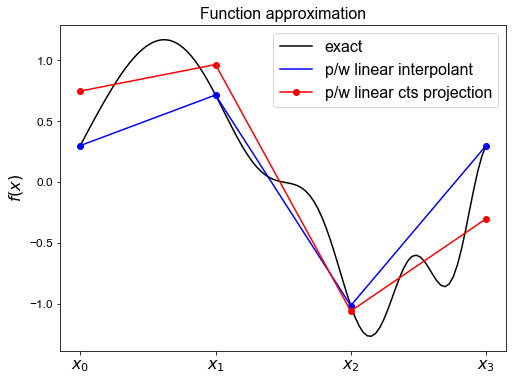

In [38]:
# our example function
def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1./N_elements
x_nodes = np.linspace(0,1,N_nodes)


# construct mass matrix
Mass_CG = mass_matrix(x_nodes)


# construct RHS vector - first initialise an array
RHS_CG = np.zeros(N_nodes)
# then do some quadrature
# loop over internal nodes
for node in range(1, N_nodes-1):
    # form the corresponding basis function
    phi_i = hat_function(node, x_nodes)
    # and the integrand we will integrate - our function multiplied by the 
    # corresponding basis function
    integrand = lambda x : f(x) * phi_i(x)
    RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node+1], integrand, 100 )

# now consider the end nodes
node = 0
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 100 )
node = N_nodes-1
phi_i = hat_function(node, x_nodes)
# integrate our function multiplied by the corresponding cts basis function
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node], integrand, 100 )

# solve our linear system
approx_CG = sl.solve(Mass_CG, RHS_CG)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
#ax1.set_xlabel('$x$', fontsize=16)
ax1.set_xticks((x_nodes[0],x_nodes[1],x_nodes[2],x_nodes[3]))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$', ), fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
# plot the exact function on a fine mesh
x_fine = np.linspace(0., 1. ,100)
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
# plot the p/w linear interpolant on a coarse mesh - P1 computed in a cell above
ax1.plot(x_fine, P1, 'b', label='p/w linear interpolant')
ax1.plot(x_nodes, f(x_nodes), 'bo')
ax1.plot(x_nodes, approx_CG , 'ro-', label='p/w linear cts projection')
ax1.legend(loc='best', fontsize=16);

## Quality of approximation

Which of these is a better approximation?

Clearly the P1 interpolant if we ask the question of accuracy at the nodes only. 

But above we established that, by construction, our projection approach should yield a result that is optimal w.r.t. the $L^2$ norm, i.e. we cannot do any better when measuring agreement using this norm.

Let's check this - that the (CG) projection has lower errors than the interpolant when measured in the L2 norm (which we compute/approximate using the RMS error norm (see next cell) evaluated on a fine mesh upon which we evaluate the true function and the discrete approximation):


<img src="figures/P1vsCGvsDG_convergence.png" style="width: 600px">


What's the DG line? See homework and the image below:

<img src="figures/CG_DG_projection.png" style="width: 600px">

if we relax the requirement of continuity between elements (and so effectively have twice as many degrees of freedom to solve for) we can achieve an even better approximation.

## RMS (root mean square) vs $L^2$ norm [reminder from ACSE-2]

Notice that I labeled the $y$ axes with RMS error rather than the $L^2$ norm. Why?

We want to compute

\begin{align*} 
e  := \| f - P_h\, f\|^2_{L^2(I)}
= \left( \int_I\, \left[f - P_h\, f\right]^2\, dx\right)^{1/2}.
\end{align*}

We can approximate the integral as

$$ \int_I\, \left[f(x) - (P_h\, f)(x)\right]^2\, dx 
\approx \sum_{i=1}^N  \, \left[f(s_i) - (P_h\, f)(s_i)\right]^2\,\Delta s.$$

I've introduced the variable $s$ here to emphasise that we want to evaluate the functions and their difference on a discrete mesh that is ideally finer than our finite element mesh, if we do this this will be an accurate approximation to the integral.

Now we note that (assuming our interval is of length 1) that

$$\Delta s = \frac{1}{N},$$

and finally we have

\begin{align*} 
e_{L^2} & := \| f - P_h\, f\|^2_{L^2(I)}\\[10pt]
&= \left( \int_I\, \left[f - P_h\, f\right]^2\, dx\right)^{1/2}\\[10pt]
&\approx \left( \frac{1}{N} \sum_{i=1}^N  \, \left[f(s_i) - (P_h\, f)(s_i)\right]^2 \right)^{1/2}
\\[10pt]
&=: e_{\text{RMS}}.
\end{align*}

Where if you look at the mathematical operations we perform here - the square **R**oot of the **M**ean of the **S**quares ... explains the name "RMS".


We can implement this in Python with something like

```Python
sl.norm(a - b) / np.sqrt(len(a))
```

where $a$ and $b$ are two vectors of discrete values. This is because the default norm is the Frobenius norm, which is what we need without having divided through by $N$. Since this norm has already taken the square root, we just need to divide through by the square root  of $N$.

Ultimately the RMS error (norm) is the appropriate discrete analogue of the $L^2$ norm.

But be careful with its use on a non-uniform mesh!

# Solving boundary value problems (BVPs) using the FEM

Recall that we considered BVPs in lecture 7 where we introduced them in the context of the steady state solution to a PDE.

As with the finite difference method, BVPs provide a useful way to explain spatial discretisation via the finite element method without needing to worry about variations in the time dimension.

## The fundamental form of the discretisation ignoring BCs

As we shall see below the details of the BCs we want to apply will change some of the discretisation details quite a lot, so initially we will explain things ignoring the BCs.

Our problem is to
find $u\equiv u(x)$ which satisfies the ODE over the interval $I=[0,1]$

$$-u'' = f,$$

for a given source term $\,f$ (subject to some BCs yet to be defined).

### Weak or variational form of problem

To progress with a FE discretisation we start from our continuous equation:

$$-u'' = f.$$

As we did with the $L^2$ projection of a function, we look for an approximation to the solution from within a finite-dimensional space of functions that is as close as possible to the true solution.

First we consider what the true continuous solution satisfies:

We look for a function $u\in V$ such that for all $v\in V$

$$\int_I \,-u''\,v\,dx = \int_I \,f\,v\,dx,$$

that is we satisfy the equation in a "weak sense".

It turns out that if we choose $V$ here to be the appropriate infinite-dimensional function space then this form of the problem *is equivalent* to the underlying differential equation.

We call the original equation the *strong form* of the problem, while we call the version where we have multiplied by $v$ and integrated the *weak* or the variational form of the problem.

### Discretisation by restricting the function space to be finite-dimensional

To discretise we simply replace the infinite-dimensional space $V$ with a finite-dimensional space $V_h$, e.g. the space of p/w linear functions we saw earlier!

This is what we mean by the finite element method approximating the solution function but not the underlying equation (or at least its weak form).

In practice we write the solution as 

$$u \approx u_h := \sum_{j=0}^N u_j \phi_j(x).$$

Previously when we were just projecting a given function this led to a discrete system with the mass matrix on the LHS. 

Now for an equation with derivatives this again leads to a discrete system, but with a *discretisation* matrix on the LHS rather than the simple mass matrix.

<br>

So now we have the discretised problem - find $u_h\in V_h$ (or equivalently find the weights $u_j$, $j=0,\ldots N$) such that:

$$\int_I \,-u_h''\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,N.$$


### Choice of basis functions (a.k.a. choice of function space a.k.a. choice of "finite element")

But now we're confronted with a problem - assuming that we've made the choice to use linear basis functions then our discrete solution $u_h$ is p/w linear, so the second derivative appearing in the above is zero everywhere and this equation doesn't make any sense.  

However, since we're asking for the weak (or variational or integral) form of the problem to be satisfied, we can perform [*integration by parts*](https://en.wikipedia.org/wiki/Integration_by_parts) and instead require that

$$\int_I \,u_h'\,\phi'_i\,dx - \int_{\partial I} u_h'\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,N.$$

Alternatively we could have considered quadratic (or higher) order basis functions and then we wouldn't have needed to integrate by parts (it would still have been *an option* for us, and as we shall see below we often make a decision to integrate by parts when we don't need to as it helps us to easily apply certain types of boundary conditions).

The topic of basis function (or finite element) choice is a massive research area where considerations of quantitative accuracy, qualitative solution behaviour, stability and efficiency come in. 

A particularly important area is in coupled problems where choosing the same basis functions (or discrete function spaces) for all variables may not be stable. An example of this is in the solution of the Navier-Stokes with the FEM, and where we talk about an appropriate *finite element pair*, i.e. appropriate function spaces for velocity and pressure. The choice of linear functions for both velocity and pressure is not stable on its own, while p/w quadratic functions for velocity and p/w linear functions for pressure is for example.

Things can get very "exotic" when we consider that we can choose discontinuous functions as well, and also in higher dimensions locate our nodes at the faces or edges of elements, rather than at the nodes as we would with the simplest basis functions (***see the very final cell of this notebook to see just how exotic!***).

### Finite element approximation

We now substitute our approximate solution function

$$u_h := \sum_{j=0}^{N} u_j\,\phi_j,$$

into our weak form (where we are ignoring the boundary integral for for simplicity)

$$\int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 f\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=0, 1,\ldots, N. $$

Following this substitution the LHS can be written as 

\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \left(\sum_{j=0}^{N} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=0}^{N} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx.
\end{align*}

We now introduce the notation for the "discretisation" (or sometimes for historical reasons "stiffness") matrix

$$ K_{ij} = \int_0^1 \phi_j'\, \phi_i' \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, N,$$

and the RHS vector

$$ b_i = \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, N.$$

Our discretised system can now be written as 

\begin{align*} 
\sum_{j=0}^{N} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx &= \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, N \\[10pt]
\iff
\sum_{j=0}^{N} u_j\, K_{ij} &= b_i, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, N 
 \\[10pt]
\iff
K\boldsymbol{u} &= \boldsymbol{b}.
\end{align*}

If we solve this matrix equation for the vector of coefficients $\,\boldsymbol{u}\,$ then we have a numerical solution to our problem.

This is just as it was for simple $L^2$ projection of a function, but now the mass matrix has been replaced by a similar discretisation matrix.  "Similar" in the sense that it is also tridiagonal and we can compute its entries in a very similar manner.


### Terminology


1. The basis function that appears in the expansion of the solution, i.e. the $\phi$ that appears in $u_h := \sum_j u_j\,\phi_j$ is termed a ***trial function*** - as it's used to form a "***trial*** solution".  The corresponding function space $V$ the $\phi$'s are a basis for, and hence the space our numerical solution lives in, is called the "***trial space***".


2. The basis function we multiply our equation by before integrating is called a "***test function***" as we are "testing" for orthogonality of this solution's residual to a function space spanned by these test functions. This function space is called the "***test space***".  


3. Note that in what we've seen above the trial functions are the same as the test functions.  This was the obvious and simplest choice (as we only needed to define a single set of basis functions and their derivatives etc) and having the same dimension meant we ended up with $n+1$ equations for $n+1$ unknowns.  However, there are reasons that one may wish to choose the test space differently to the trial space. 


4. When we use the same space for test and trial functions the discretisation we end up with is called a ***Galerkin*** method (sometimes Bubnov-Galerkin), if different it is called a ***Petrov-Galerkin*** method

### Implementation

Recall that our basis functions are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

which looks like the following:

<img src="figures/fem_basis_functions.svg" style="width: 800px">

<br>

and so their derivatives are simply

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

i.e. they are constant within elements.

Let's write a function to return these values, and plot them to make sure they look right.

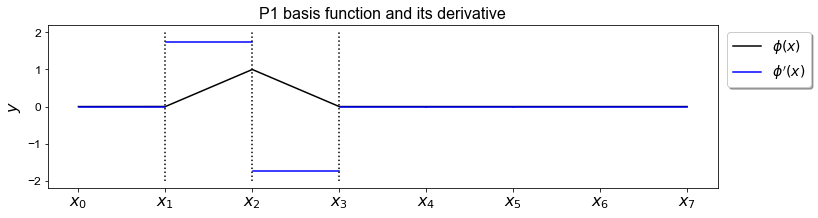

In [39]:
def hat_function_deriv(i, x_nodes):
    """ Derivative of linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (-1)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (1)/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (1)/dx[i-1], (-1)/dx[i] ] ,0.0)
    return hat

x_nodes = np.linspace(0,4,8)

# the following would give you a variable mesh!
#x_nodes = x_nodes + ((x_nodes[-1]-x_nodes[0])/5)*np.random.rand(len(x_nodes))

x_fine = np.linspace(0,4,1000)

fig = plt.figure(figsize=(12, 3))
ax1 = fig.add_subplot(111)
ax1.set_xticks((x_nodes))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$x_7$' ), 
                    fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('P1 basis function and its derivative', fontsize=16)

# you can change the following to be in [0,n]
node = 2
phi = hat_function(node, x_nodes)
ax1.plot(x_fine, phi(x_fine), 'k-',label='$\phi(x)$');
phi_x = hat_function_deriv(node, x_nodes)
for i in range(len(x_nodes)-1):
    ax1.plot(x_fine[(x_fine>x_nodes[i]) & (x_fine<x_nodes[i+1])], 
             phi_x(x_fine[(x_fine>x_nodes[i]) & (x_fine<x_nodes[i+1])]), 
             'b-',label="$\phi'(x)$" if i==0 else "")
ax1.plot([x_nodes[node-1],x_nodes[node-1]], [-2,2],'k:')
ax1.plot([x_nodes[node],x_nodes[node]], [-2,2],'k:')
ax1.plot([x_nodes[node+1],x_nodes[node+1]], [-2,2],'k:')
ax1.legend(loc="upper right", bbox_to_anchor=(1.15,1.0), shadow=True, ncol=1, fontsize=14)

<div class="optional">

The fact that the basis function derivatives that appear in the integrand are all constants over individual elements makes this discretisation matrix especially easy to evaluate. 

Let's consider an internal row $i$:

\begin{align*}
K_{ii} 
&= \int_0^1 \phi_i'\, \phi_i' \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_i' \,dx + \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_i' \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{1}{\Delta x_{i-1}} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{-1}{\Delta x_{i}} \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}^2} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{1}{\Delta x_{i}^2} \,dx
\\[10pt]
&= \frac{\Delta x_{i-1}}{\Delta x_{i-1}^2} + \frac{\Delta x_{i}}{\Delta x_{i}^2}
\\[10pt]
&= \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}.
\end{align*}

Similarly,

\begin{align*}
K_{i,i-1} 
&= \int_0^1 \phi_i'\, \phi_{i-1}' \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i-1}' \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{-1}{\Delta x_{i-1}} \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{-1}{\Delta x_{i-1}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{i-1}},
\end{align*}

and

\begin{align*}
K_{i,i+1} 
&= \int_0^1 \phi_i'\, \phi_{i+1}' \,dx 
\\[10pt]
&= 
\int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i+1}' \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{1}{\Delta x_{i}} \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{i}}.
\end{align*}

Now consider the case $i=0$:

\begin{align*}
K_{0,0} 
&= \int_0^1 \phi_0'\, \phi_0' \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_1} \phi_0'\, \phi_0' \,dx \\[10pt]
&= \int_{x_{0}}^{x_1} \frac{-1}{\Delta x_{0}}\, \frac{-1}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_1} \frac{1}{\Delta x_{0}^2} \,dx \\[10pt]
&= \frac{1}{\Delta x_{0}},
\end{align*}

and 

\begin{align*}
K_{0,1} 
&= \int_0^1 \phi_0'\, \phi_{1}' \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_{1}} \phi_0'\, \phi_{1}' \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} \frac{-1}{\Delta x_{0}}\, \frac{1}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} \frac{-1}{\Delta x_{0}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{0}},
\end{align*}

which by symmetry is that same as $K_{1,0}$. 

The entries for the $i=n$ row are defined similarly in terms of $\Delta x_n$.

</div>

Let's construct an example of the $K$ matrix, and compare to the mass matrix:

In [40]:
N_elements_CG = 5
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)

K = np.zeros((N_nodes_CG, N_nodes_CG ))

K[1:-1,1:-1] = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) - np.diag(1. / dx[1:-1]   , k=-1) - np.diag(1. / dx[1:-1]   , k=1)
# add in the top row entries
K[0,0] = 1. / dx[0]
K[0,1] = -1. / dx[0]
K[1,0] = -1. / dx[0]
# add in the bottom row entries
K[-1,-1] = 1. / dx[-1]
K[-1,-2] = -1. / dx[-1]
K[-2,-1] = -1. / dx[-1]

print('K = ')
print(K)

# compare to the mass matrix
%precision 3
print('\nM= ')
print(mass_matrix(x_nodes))

K = 
[[ 5. -5.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0. -5.  5.]]

M= 
[[0.067 0.033 0.    0.    0.    0.   ]
 [0.033 0.133 0.033 0.    0.    0.   ]
 [0.    0.033 0.133 0.033 0.    0.   ]
 [0.    0.    0.033 0.133 0.033 0.   ]
 [0.    0.    0.    0.033 0.133 0.033]
 [0.    0.    0.    0.    0.033 0.067]]


## A simple problem with homogeneous Dirichlet BCs

Now let's complete the description of our problem through the addition of some boundary conditions - our problem is not well-posed (we cannot solve it) without the addition of appropriate BCs.

### Problem description

Find $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$

$$-u'' = f,$$

for a given source term $\,f$, with homogeneous Dirichlet boundary conditions:

$$ u(0) = u(1) = 0.$$

Physically we can interpret this as the steady state solution to a diffusion problem with a source given by $f$ and the solution "clamped" at the value zero at the ends of the domain.

To begin let's consider the problem with $f\equiv 1$ which with these BCs has the exact solution $u=-x(x-1)/2$.

### Finite element approximation

For this version of the problem (i.e. with Dirichlet boundary conditions) we have to make a few changes to what we did above for the generic case with no boundary conditions.

In the case of Dirichlet BCs we know the value of the solution at the ends of the domain, and so we do not need to solve for the discrete values $u_0$ and $u_N$.

Furthermore, since these take the values zero in this case
the approximate solution we substitute into our weak form is therefore 

$$u_h := \sum_{j=1}^{N-1} u_j\,\phi_j,$$

[we've dropped the first and last terms in the summation that we know are zero - a consequence is that our approximate solution only has $N-1$ free parameters].

Said another way, we look for a solution to our problem in the space of p/w linear functions which are zero at the boundaries:

$$V_h^0 := \left\{v \in V_h \,|\, v(0)=v(1)=0\right\}.$$

In our weak form we test against all $v\in V_h^0$, and since all these $v$ vanish at the boundary
this justified why in this case we can simply ignore the boundary term in our weak form (i.e. 
$\int_{\partial I} u_h'\,v\,dx = 0$) and thus we have:

$$\int_I \,u_h'\,v'\,dx = \int_I \,f\,v\,dx, \quad \forall v\in V_h^0.$$

We can again equivalently instead consider basis functions and ask that our solution satisfies

$$\int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 f\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, N-1, $$

where now $i$ ranges over 2 less values (as $V_h^0$ is now $N-1$ rather than $N+1$ dimensional on our mesh).

[This is equivalent to the "lifting" approach for imposing BCs we saw in previous lectures].

Substituting in our form for our numerical solution again leads us to the matrix system

$$K\boldsymbol{u} = \boldsymbol{b},$$

where $K$ and $\boldsymbol{b}$ are defined as before, but without the first and last rows and columns (for $A$) we had previously.


In [2]:
# don't need the composite version of Simpson's rule here - 
# use the non composite version that is able to integrate over a 
# **single** interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

In [42]:
# let's discretise and solve our problem using the FEM

def f(x):
    return 1.0

def u_exact(x):
    return -0.5*x*(x-1)

N_elements_CG = 9
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)

# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG -2 , N_nodes_CG -2 ))

# we only need the internal entries of the K defined above in this case
K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

# print out K to show that we've lost the first and last rows/columns 
# compared to the previous K we printed
print(K)

# form RHS vector by integrating the function f multiplied by a basis function.
# loop over internal nodes
RHS = np.zeros(N_nodes_CG - 2)
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

# now we have our equation for the unknowns (K @ u=RHS) solve for u:
u = sl.solve(K,RHS)

[[18. -9.  0.  0.  0.  0.  0.  0.]
 [-9. 18. -9.  0.  0.  0.  0.  0.]
 [ 0. -9. 18. -9.  0.  0.  0.  0.]
 [ 0.  0. -9. 18. -9.  0.  0.  0.]
 [ 0.  0.  0. -9. 18. -9.  0.  0.]
 [ 0.  0.  0.  0. -9. 18. -9.  0.]
 [ 0.  0.  0.  0.  0. -9. 18. -9.]
 [ 0.  0.  0.  0.  0.  0. -9. 18.]]


error (RMS at nodes only) =  2.0525524970989362e-17


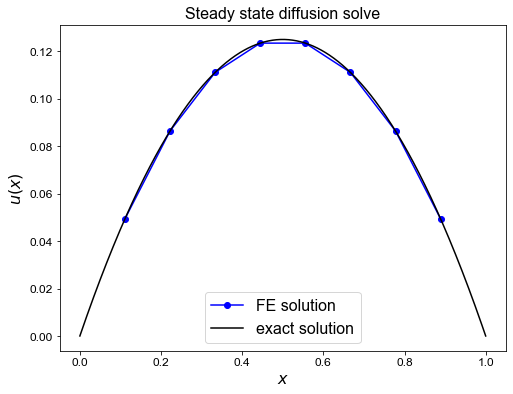

In [43]:
# plot the exact solution and our numerical approximation, 
# and print out the RMS error

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, -0.5*x_fine*(x_fine-1), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - (-0.5*x_nodes[1:-1]*(x_nodes[1:-1]-1)) )
      /np.sqrt(len(u)) )

### Comments

- We could of course add back in the fact that $u_h(0)=u_h(1)=0$ values to get a solution plot that extends all the way to the boundaries.


- Notice that we have obtained a solution in this case that is exact (to round off error) at the nodes. This is because we can evaluate the RHS vector exactly (i.e. no errors are introduced in this step) and also as our scheme is of high enough order to be able to integrate this problem exactly.


- But notice that the error is not zero when considered in the interior of elements - we'll return to the point in the next example.


Let's try a more complicated problem.

<div class="optional">

## An example with a more complex RHS with homogeneous Dirichlet BCs [$\star$]

Now let's consider an example of a problem with a more complex $f$ and hence solution.

The complexity of $f$ means we have more to do when evaluating the RHS vector, but still having homogeneous Dirichlet BCs means we don't have to change the LHS.

</div>

error (RMS at nodes only) =  5.160570601460748e-06


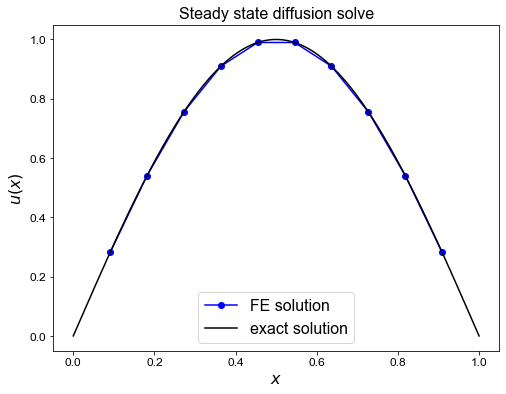

In [44]:
# Note that this is essentially an MMS - we define the solution first that satisfies the BCs
# and then substitute into the BVP to find the appropriate RHS source term

def u_exact(x):
    return np.sin(np.pi*x)

def f(x):
    # just -u''
    return (np.pi**2)*np.sin(np.pi*x)

N_elements_CG = 11
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
    # NB. if we increase the number of intervals we can get arbitrarily 
    # small errors at the nodes

# now we have our equation for the unknowns (K @ u=RHS) solve for u:
u = sl.solve(K,RHS)

# plot the result
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

<div class="optional">

### A convergence analysis

Let's check how the error converges with $\Delta x$.

We will compute the RMS error at the nodes only (as above), but will also evaluate both the exact solution and the p/w linear numerical approximation on a finer mesh and compute the RMS error of the difference - this will be an approximation to the L2 error.

</div>

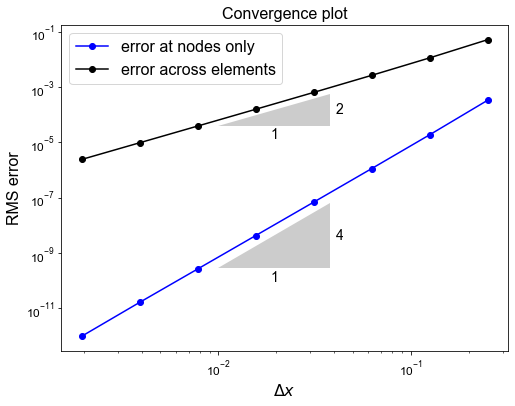

In [45]:
def u_exact(x):
    return np.sin(np.pi*x)

def f(x):
    # just -u''
    return (np.pi**2)*np.sin(np.pi*x)

# some meshes of increasingly finer resolution to loop over
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    u = sl.solve(K,RHS)

    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((1e-2, 3e-10), (4, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

<div class="optional">

### Comments

So our solver is 4th order accurate in terms of the nodal values, while it is second order accurate in the norm we really care about here - the L2 norm (which we approximate via RMS evaluated in a fine mesh).

</div>

<div class="optional">

## Dealing with more complex BCs (Inhomogeneous Dirichlet)  [$\star$]

Now let's see what we need to do in the case that the BCs are non-zero.

</div>

<div class="optional">

### Problem description

Now let's consider a BVP problem we considered in lecture 7 (specifically the diffusion only case with fixed values at the end points - recall the exact solution to the problem was a linear that joined the two boundary condition values).

Find $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$

$$-u'' = f,$$

for a given source term $\,f$, with inhomogeneous Dirichlet boundary conditions:

$$ u(0) = u_L, \;\;\;\; u(1) = u_R.$$

We'll seek to code up the general case, although to match L7 we are interested in a case with $\,f\equiv 0\,$, $\,u_L=0\,$ and $\,u_R=1$.

</div>

<div class="optional">

### Finite element approximation

In this case we write our solution as

$$u_h := \sum_{j=0}^{N} u_j\,\phi_j 
= \sum_{j=1}^{N-1} u_j\,\phi_j + u_0\,\phi_0 + u_N\,\phi_N,$$

where $\phi_0$ and $\phi_n$ are defined as per the other basis functions (i.e. $\phi_0$ is unity at node 0 (the boundary) and zero elsewhere), and we choose $u_0=u_L$ and $u_N=u_R$.  These additional components are hence essentially interpolating the prescribed boundary data.

So we are still actually solving for the internal degrees of freedom:  $u_j$, for $j=1,\ldots,N-1$.  

This means that it is still appropriate for us to use the reduced space $V_h^0$ to test our solution against, i.e. we again ignore the boundary terms in the weak form and ask that

$$\int_0^1 u_h'\,\phi_i' \,dx 
= \int_0^1 f\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, N-1. $$

Note a difference now though that our $u_h$ does include known $\phi_0 $ and $\phi_n$ terms. Let's see now how this affects things.

In this case the integral in the LHS can be written as 

\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \,\left(\sum_{j=0}^{N} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=0}^{N} u_j\, \int_0^1 \,\phi_j'\,\phi_i' \,dx \\[10pt]
&= 
\sum_{j=1}^{N-1} u_j\, \int_0^1 \phi_i'\, \phi_j' \,dx 
+u_0\, \int_0^1 \phi_i'\, \phi_0' \,dx
+u_n\, \int_0^1 \phi_i'\, \phi_N' \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, N-1.
\end{align*}

Note that we will move the (two) boundary term contributions on to the right hand side as they are known. 

We explain in the code that follows how these additional contributions are added into the RHS vector.

Our left hand side "discretisation" matrix is the same $(N-1)\times (N-1)$ matrix as above (the original full $K$ without the first and last rows)

while the RHS vector has entries

$$ b_{i} = \int_0^1 f\, \phi_i \,dx
-u_0\, \int_0^1 \phi_i'\, \phi_0' \,dx
-u_n\, \int_0^1 \phi_i'\, \phi_N' \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i = 1, 2,\ldots, N-1.$$

Our discretised system is again $\,K\boldsymbol{u} = \boldsymbol{b}$.

If we solve this matrix equation for the coefficients $\boldsymbol{u}$ then we have a numerical solution to our problem.

</div>

error (RMS at nodes only) =  3.142637229273806e-16


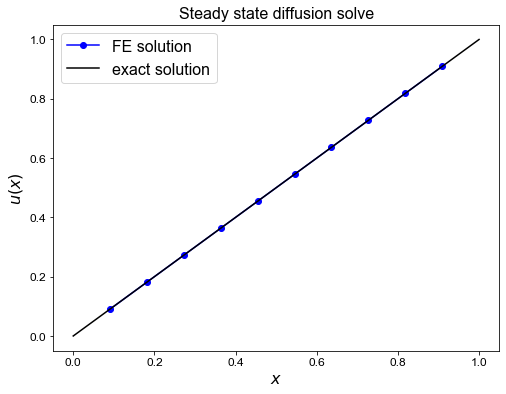

In [46]:
uL = 0.
uR = 1.

def f(x):
    return 0.0

def u_exact(x):
    return uL + x*(uR-uL)


N_elements_CG = 11
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    
# Add in the extra entries due to the inhomogeneous BCs

# At the left the integral is only non-zero when d(phi_i)/dx and d(phi_0)/dx both have
# support - this only occurs over the first element when i=1 (remembering that i=0
# isn't in our trial space. The integrand is then the value u(0) = uL
# multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
# multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
# Overall this is a constant, and hence to do the integral we just need to 
# multiply it by the size of the cell (dx[0]), and subtract the result from the
# current RHS entry for this node:
RHS[0] = RHS[0] - (uL * 1/dx[0] * (-1/dx[0]))*dx[0]

# and similarly for the RHS - we need to update the final entry
RHS[-1] = RHS[-1] - (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1]

# now solve
u = sl.solve(K,RHS)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

<div class="optional">

## Dealing with more complex BCs (Neumann conditions)  [$\star$]

One of the big advantages of the FEM is that realistic (i.e. physically meaningful) BCs are relatively easy to incorporate.  

Let's consider Neumann conditions (i.e. specifying the value of the derivative at the boundaries)
which will see can ***naturally*** be incorporated into our FEM formulation, but in a very different way to how we deal with Dirichlet conditions.
    
Let's actually consider a problem with one Dirichlet and one Neumann BC.

</div>

<div class="optional">

### Problem description

Find $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$

$$-u'' = f,$$

for a given source term $\,f$, with an inhomogeneous Dirichlet boundary condition at the left
and an inhomogeneous Nemuann BC at the right:

$$ u(0) = u^D_L, \;\;\;\; u'(1) = u^N_{R}.$$


NB. for this particular ODE problem specifying **two** Neumann conditions yields an ill-posed problem - why is this?


### Variational form of problem

In this case we integrate by parts 

$$
-\int_0^1 u''\,v \,dx = \int_0^1 u'\,v' \,dx - \left[u'(x)\,v(x)\right]_0^1 = \int_0^1 f\,v \,dx,
$$

and keep the boundary integral on those parts of the domain where the Neumann condition is applied (we drop the boundary contribution at the Dirichlet boundary for the same reasons as in the previous example):

$$
\int_0^1 u'\,v' \,dx = \int_0^1 f\,v \,dx +  u^N_{R}\,v(1) ,
$$

where we have substituted in our known Neumann data: $\,u'(1)= u^N_{R}$ and used the fact that we enforce the Dirichlet with test functions with the property that $v(0)=0$.

</div>

### Aside: homogeneous Neumann boundary conditions

Note that the *homogeneous* form of Neumann conditions are especially easy to deal with, we simply do not perform the boundary integration.

**Doing nothing** is the correct implementation of the boundary condition for the correct underlying problem (i.e. variational) formulation.

So if in our very first example where we applied homogeneous Dirichlet BCs by actually solving over $i,j = 1,\ldots, N-1$.  If we had solved for $i,j = 0,\ldots, N$ while ignoring the boundaries, we would have effectively solved a version of the problem with homogeneous Neumann BCs (which would have led to a singular matrix for this particular problem due to this issue with two homogeneous Neumann conditions explained above).

<div class="optional">

### Finite element approximation

In this case we write our solution as

$$u_h := \sum_{j=0}^{N} u_j\,\phi_j 
= \sum_{j=1}^{n} u_j\,\phi_j + u_0\,\phi_0.$$

Note that explicit here is that fact that we don't know our solution at the right hand boundary (and hence we need to solve for $u_N$). We thus strip out the $u_0$ term and define our test function space correspondingly to be that spanned by $\phi_i$ for $i=1, 2,\ldots, N$. We will thus end up solving in this case a $N\times N$ system.

Our variational form is in this case

$$\int_0^1 u_h'\,\phi_i' \,dx 
= \int_0^1 f\,\phi_i \,dx + u_R^N\,\delta_{i,N}, \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, N. $$

$\delta_{i,n}$ is the [*Kronecker delta*](https://en.wikipedia.org/wiki/Kronecker_delta) which is equal to one when $i=n$, otherwise it is zero. This is introduced here simply to emphasise that the Neumann boundary data contributes as a boundary integral at the right hand boundary node (i.e. $i=n$) only.

In this case the integral in the LHS can be written as 

\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \left(\sum_{j=0}^{N} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=1}^{N} u_j\, \int_0^1 \phi_i'\, \phi_j' \,dx 
+u_0\, \int_0^1 \phi_i'\, \phi_0' \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, N.
\end{align*}

As before we will move the boundary Dirichlet contribution over to the right hand side as it is known.

Our "discretisation" matrix $K$ in this case keep the final row of the full $K$ we originally defined, but does not include the first row.


and

$$ b_{i-1} = \int_0^1 f\, \phi_i \,dx + u^N_{R}\delta_{i,N}
-u_0\, \int_0^1 \phi_i'\, \phi_0' \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i = 1, 2,\ldots, N.$$

So now in this case we have to add into $\boldsymbol{b}$ a term corresponding to the Dirichlet condition, as well as the Neumann condition.  We explained how to deal with the Dirichlet term in a previous example. As we will see in the code below adding in the Neumann term is especially easy.

</div>

error (RMS at nodes only) =  8.149528741558731e-16


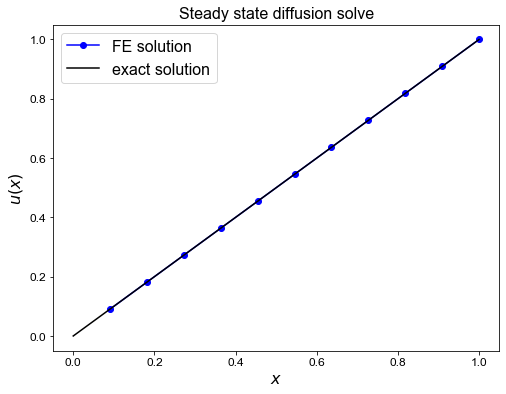

In [47]:
uL = 0.
uRn = 1.

def f(x):
    return 0.0

def u_exact(x):
    return uL + uRn*x

N_elements_CG = 11
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 1, N_nodes_CG - 1))
RHS = np.zeros(N_nodes_CG - 1)

K[:-1,:-1] = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)
# add in the extra bottom right entries
K[-1,-1] = 1. / dx[-1]
K[-1,-2] = -1. / dx[-1]
K[-2,-1] = -1. / dx[-1]

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG-1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

# need to add in the right hand boundary contribution to the RHS vector
# only contribution comes from the final element
phi_i = hat_function(N_nodes_CG-1, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS[-1] = simpsons_rule(x_nodes[-2], x_nodes[-1], integrand, 1 )
    
# Add in the extra entries due to the inhomogeneous BCs

# At the left the integral is only non-zero when phi_i and phi_0 both have
# support - this only occurs over the first element. The integrand is then
# uL multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
# multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
# This is a constant, and hence to do the integral we just need to 
# multiply by the size of the cell (dx[0]):
RHS[0] = RHS[0] - (uL * 1/dx[0] * (-1/dx[0]))*dx[0]

# And finally, now also add a Neumann condition at the right - 
# note we're perform a boundary integral here
RHS[-1] = RHS[-1] + uRn

    

u = sl.solve(K,RHS)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:]) )
      /np.sqrt(len(u)) )

# Final comments

That might have all seemed like a lot of work (to essentially arrive at something not completely  dis-similar to what FDM could do) with a lot of additional steps and computational overhead (e.g. all those quadratures we did not need with FDM).

But the power of the FEM really comes into play when


1. we move to higher dimensions, and/or


2. we use more exotic basis functions, and/or


3. we want to make use of some of the theoretical properties that can be established with the FEM, e.g. rigorous error estimators that can be used to guide adaptive mesh algorithms to achieve accuracy and efficiency.


An important final thing for you to understand is how we would go about discretising more complex equations - to help with this a homework questions asks you to consider the problem $u''+u=f$.

# The perodic table of finite elements

<img src="figures/femtable.png" style="width: 800px">

for more details see <http://www-users.math.umn.edu/~arnold/femtable/>